In [1]:
%matplotlib inline
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

Automatically created module for IPython interactive environment



# 1. Nearest Neighbors Classification

Sample usage of Nearest Neighbors classification.
It will plot the decision boundaries for each class.


In [2]:
# import some data to play with
iris = datasets.load_iris()

# We use the Iris flowers again as in logistic/softmax regression classifications.

In [20]:
# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

In [21]:
h = .02  # step size in the mesh

In [22]:
# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

### Uniform weight function used in prediction
weights='uniform'  : uniform weights. All points in each neighborhood are weighted equally.

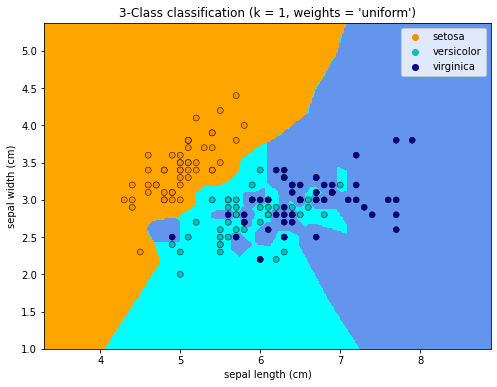

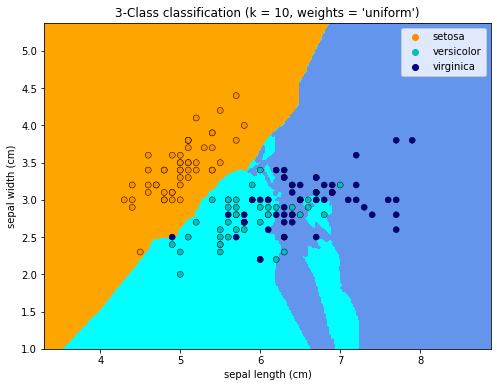

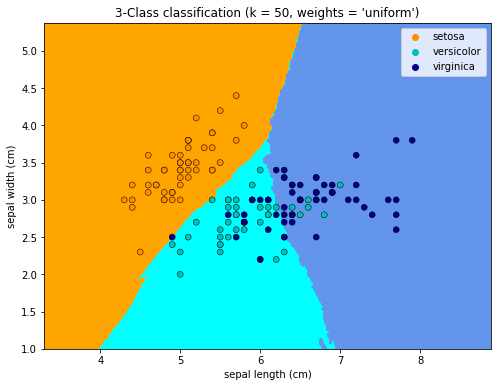

In [28]:
for n_neighbors in [1,10, 50]:  
    weights='uniform'

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

plt.show()

### Distance weight function used in prediction
weights='distance'  :  weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

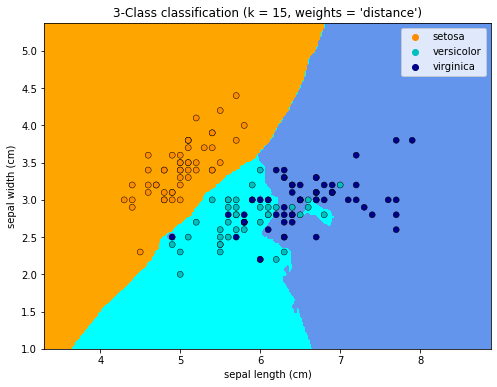

In [12]:
n_neighbors = 15
weights='distance'

clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')"
          % (n_neighbors, weights))
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.show()


# 2. Nearest Neighbors Regression

 

In [30]:
x = 2*np.arange(50)
y = np.sin(x/10) + (x/50)**2 + 0.2*np.random.randn(50)
z = np.sin(x/10) + (x/50)**2

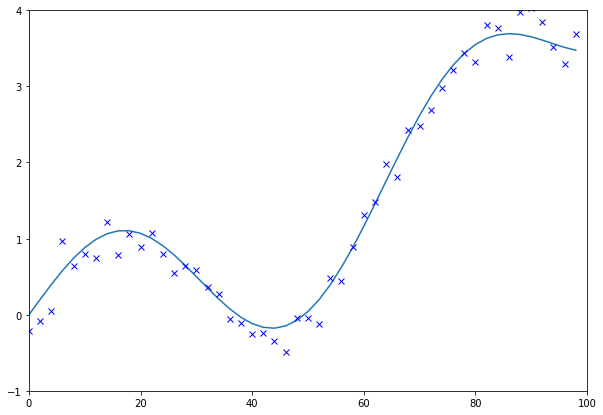

In [31]:
fig, ax = plt.subplots() 

plt.plot(x, z) # Precise graph

plt.plot(x, y, "bx") # Data points with noise 
#plt.xlabel("$x_1$", fontsize=18)
#plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 100, -1, 4]) 
fig.set_size_inches(10, 7) 

plt.show()

In [32]:
n_neighbors = 5
X = np.reshape(x, (-1, 1))

T = np.linspace(0, 100, 50)[:, np.newaxis]

# Fit regression model
fig.set_size_inches(16, 7) 

In [48]:
fig, ax = plt.subplots()

#Plot the graphs
for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color='blue',"bx", label='data',)
    plt.plot(T, y_, color='red', label='prediction')
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

fig.set_size_inches(10, 15) 

plt.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-48-70fd1e3fb4f2>, line 9)

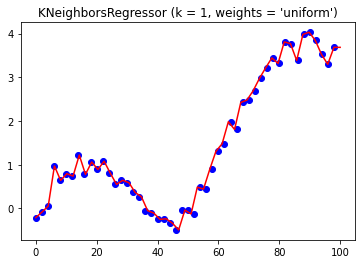

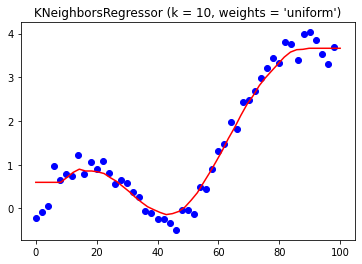

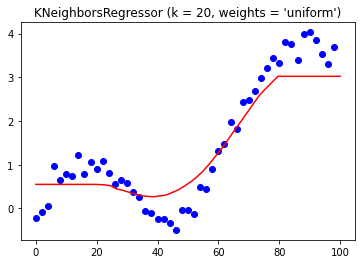

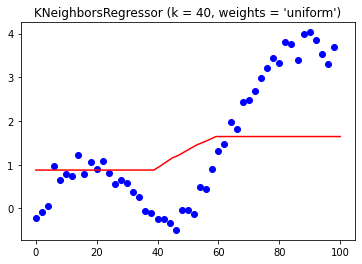

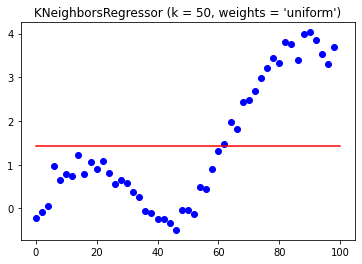

In [46]:
for n_neighbors in [1,10, 20, 40, 50]:  
    weights='uniform'
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)
    plt.scatter(X, y, color='blue', label='data')
    plt.plot(T, y_, color='red', label='prediction')
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

    fig.set_size_inches(10, 15) 
    plt.show()